# Optimizing a neural network with backward propagation
> Learn how to optimize the predictions generated by your neural networks. You'll use a method called backward propagation, which is one of the most important techniques in deep learning. Understanding how it works will give you a strong foundation to build on in the second half of the course. This is the Summary of lecture "Introduction to Deep Learning in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Deep_Learning]
- image: 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

## The need for optimization
- Predictions with multiple points
    - Making accurate predictions gets harder with more points
    - At any set of weights, there are many values of the error corresponding to the many points we make predictions for
- Loss function
    - Aggregates errors in predictions from many data points into single number
    - Measure of model's predictive performance
    - Lower loss function value means a better model
    - Goal: Find the weights that give the lowest value for the loss function
        - Gradient Descent
- Graduent Descent
    - start at random point
    - Until you are somewhere flat:
        - Find the slop
        - Take a step downhill
    

### Coding how weight changes affect accuracy
Now you'll get to change weights in a real network and see how they affect model accuracy!

Have a look at the following neural network:

![nn](image/ch2ex4.png)

Its weights have been pre-loaded as `weights_0`. Your task in this exercise is to update a single weight in `weights_0` to create `weights_1`, which gives a perfect prediction (in which the predicted value is equal to target_actual: 3).

Use a pen and paper if necessary to experiment with different combinations. You'll use the `predict_with_network()` function, which takes an array of data as the first argument, and weights as the second argument.

In [4]:
def relu(input):
    '''Define your relu activatino function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculate
    return output

In [5]:
def predict_with_network(input_data_point, weights):
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)
    
    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)
    
    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

In [6]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {
    'node_0': [2, 1],
    'node_1': [1, 2],
    'output': [1, 1]
}

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that caus the network to make perfect prediction (3): weights_1
weights_1 = {
    'node_0': [2, 1],
    'node_1': [1, 2],
    'output': [1, 0]
}

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


### Scaling up to multiple data points
You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as weights_0 and weights_1.

`input_data` is a list of arrays. Each item in that list contains the data to make a single prediction. `target_actuals` is a list of numbers. Each item in that list is the actual value we are trying to predict.

In this exercise, you'll use the `mean_squared_error()` function from `sklearn.metrics`. It takes the true values and the predicted values as arguments.

In [9]:
weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 1.5]), 'output': np.array([1, 1.5])}
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

In [10]:
from sklearn.metrics import mean_squared_error

# Create model_output_0
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))
    
# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(model_output_0, target_actuals)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(model_output_1, target_actuals)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" % mse_0)
print("Mean squared error with weights_1: %f" % mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


## Gradient descent
- Gradient descent
    - If the slope is positive:
        - Going opposite the slope means moving to lower numbers
        - Subtract the slope from the current value
        - Too big a step might lead us astray
    - Solution: learning rate ($\eta$)
        - Update each weight by subtracting learning rate * slope

### Calculating slopes
You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is `2 * x * (xb-y)`, or `2 * input_data * error`. Note that `x` and `b` may have multiple numbers (`x` is a vector for each data point, and b is a vector). In this case, the output will also be a vector, which is exactly what you want.

You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called `weights` as well as data for a single point called `input_data`. The actual value of the target you want to predict is stored in `target`.

In [11]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

In [12]:
# Calculate the predictions: preds
preds = (input_data * weights).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[14 28 42]


### Improving model weights
Hurray! You've just calculated the slopes you need. Now it's time to use those slopes to improve your model. If you add the slopes to your weights, you will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

In [13]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


### Making multiple updates to weights
You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.

To keep your code clean, there is a `get_slope()` function that takes `input_data`, `target`, and `weights` as arguments. There is also a `get_mse()` function that takes the same arguments. 

This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that weights is a single array.

In [17]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return error

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return slope

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors ** 2)
    return mse

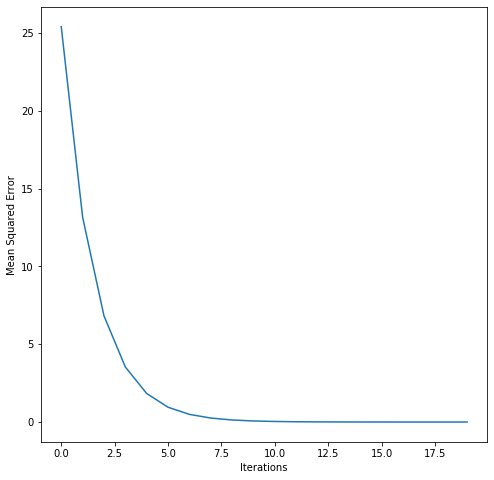

In [18]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - learning_rate * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)
    
# Plot the mse history
plt.plot(mse_hist);
plt.xlabel('Iterations');
plt.ylabel('Mean Squared Error');

## Backpropagation
- Backpropagation
![bp](image/bp.png)
    - Allows gradient descent to update all weights in neural network (by getting gradients for all weights)
    - Comes from chain rule of calculus
    - Important to understand the process, but you will generally use a library that implements this
- Backpropagation process
    - Trying to estimate the slope of the loss function w.r.t each weight
    - Do forward propagation to calculate predictions and errors
    - Go back one layer at a time
    - Gradients for weight is product of:
        1. Node value feeding into that weight
        2. Slope of loss function w.r.t node it feeds into
        3. Slope of activation function at the node it feeds into
    - Need to also keep track of the slopes of the loss function w.r.t node values
    - Slope of node values are the sum of the slopes for all weights that come out of them

## Backpropagation in practice
- Calculating slopes associated with any weight
    - Gradients for weight is product of:
        1. Node value feeding into that weight
        2. Slope of activation function for the node being fed into
        3. Slope of loss function w.r.t output node
- Recap
    - Start at some random set of weights
    - Use forward propagation to make a prediction
    - Use backward propagation to calculate the slope of the loss function w.r.t each weight
    - Multiply that slope by the learning rate, and subtract from the current weights
- Stochastic Gradient descent
    - It is common to calculate slopes on only a subset of the data (a batch)
    - Use a different batch of data to calculate the next update
    - Each time through the training data is called an epoch
    - When slopes are calculated on one batch at a time: stochastic gradient descent